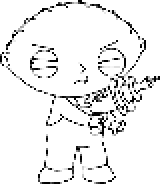

In [5]:
using ImageMagick, Images, ImageTransformations
download("https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/Yin_yang.svg/699px-Yin_yang.svg.png", "yy.png")
im = Gray.(imresize(load("stewie.png"), ratio=0.2))
img = Int.(round.(im))
display(imresize(im, ratio=1))

In [6]:
y = vcat(img...)
length(y)

7360

In [7]:
include("../code/headers.jl")
q = 2
n = length(y)
R = reverse(0.2:0.2:0.8)
nrates = length(R)
m = Int.(round.(n*(1 .- R)))
seed = 234
# algo = MS(maxiter=100, Tmax=1)
algo = OptimalCycle()
compressed = [zeros(Int,n) for r in R];

In [8]:
for j in 1:nrates
    print("Rate $j of $nrates: ")
    lm = LossyModel(q, n, m[j], y=y)
    breduction!(lm,1)
    res = solve!(lm, algo, randseed=seed, verbose=true, showprogress=true)
    compressed[j] = lm.x
end

Rate 1 of 4: E = 6820.0
Iter 1. Distortion 0.7266. Cycle weight -2944.0. Energy shift -1472.0
Iter 2. Distortion 0.5266. Cycle weight -2944.0. Energy shift -1472.0
Iter 3. Distortion 0.3268. Cycle weight -2942.0. Energy shift -1471.0
Iter 4. Distortion 0.1352. Cycle weight -2820.0. Energy shift -1410.0
Iter 5. Distortion 0.0424. Cycle weight -1366.0. Energy shift -683.0
Iter 6. Distortion 0.0424. Cycle weight 0.0. Energy shift 0.0
distortion 0.042
Rate 2 of 4: E = 6820.0
Iter 1. Distortion 0.5268. Cycle weight -5886.0. Energy shift -2943.0
Iter 2. Distortion 0.1534. Cycle weight -5496.0. Energy shift -2748.0
Iter 3. Distortion 0.1484. Cycle weight -74.0. Energy shift -37.0
Iter 4. Distortion 0.1484. Cycle weight 0.0. Energy shift 0.0
distortion 0.148
Rate 3 of 4: E = 6820.0
Iter 1. Distortion 0.3351. Cycle weight -8708.0. Energy shift -4354.0
Iter 2. Distortion 0.2121. Cycle weight -1810.0. Energy shift -905.0
Iter 3. Distortion 0.2117. Cycle weight -6.0. Energy shift -3.0
Iter 4. Dist

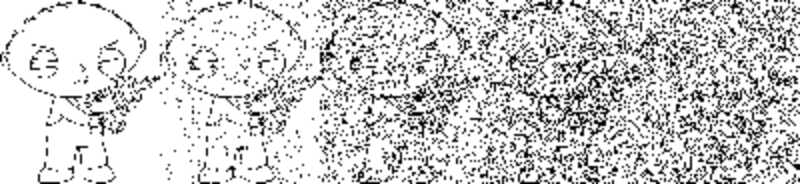

In [9]:
compressed_imgs = [reshape(x, size(im)) for x in compressed]
display(imresize(Gray.(hcat(img, compressed_imgs...)), ratio=2))